In [1]:
from os import path
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
DATA_DIR = 'Data'
FIG_DIR = 'Figures/State/'

# 0. Load and manipulate dataset

In [2]:
state_dataset = pd.read_csv(path.join(DATA_DIR, 'state_dataset.csv'))
state_dataset.head()

,state,CO2_per_capita,partisanship,governor,governor_party,climate_alliance
0,Alabama,23.2,27.0,Kay Ivey,Republican,False
1,Alaska,47.6,15.0,Mike Dunleavy,Republican,False
2,Arizona,13.1,9.0,Doug Ducey,Republican,False
3,Arkansas,23.6,24.0,Asa Hutchinson,Republican,False
4,California,9.0,-24.0,Gavin Newsom,Democratic,True


In [4]:
state_dataset[['climate_alliance']] = state_dataset[['climate_alliance']].astype(int)
state_dataset[['is_democrat']] = (state_dataset[['governor_party']] == 'Democratic ').astype(int)
state_dataset.head()

,state,CO2_per_capita,partisanship,governor,governor_party,climate_alliance,is_democrat
0,Alabama,23.2,27.0,Kay Ivey,Republican,0,0
1,Alaska,47.6,15.0,Mike Dunleavy,Republican,0,0
2,Arizona,13.1,9.0,Doug Ducey,Republican,0,0
3,Arkansas,23.6,24.0,Asa Hutchinson,Republican,0,0
4,California,9.0,-24.0,Gavin Newsom,Democratic,1,1


In [5]:
state_dataset.describe()

,CO2_per_capita,partisanship,climate_alliance,is_democrat
count,50.000000,50.000000,50.000000,50.000000
mean,21.326000,6.060000,0.480000,0.460000
std,17.871512,19.701248,0.504672,0.503457
min,9.000000,-36.000000,0.000000,0.000000
25%,11.525000,-8.500000,0.000000,0.000000
50%,16.550000,5.500000,0.000000,0.000000
75%,23.500000,22.000000,1.000000,1.000000
max,109.900000,47.000000,1.000000,1.000000


# 1. CO2 model

## 1.1. Full linear model

In [6]:
model = smf.ols(formula='CO2_per_capita ~ partisanship + climate_alliance + is_democrat', data = state_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CO2_per_capita   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.771
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           0.000104
Time:                        19:19:39   Log-Likelihood:                -203.29
No. Observations:                  50   AIC:                             414.6
Df Residuals:                      46   BIC:                             422.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.6726      4.811  

In [7]:
corr_matrix = state_dataset.corr()
corr_matrix['CO2_per_capita'].sort_values(ascending = False)

CO2_per_capita      1.000000
partisanship        0.577478
is_democrat        -0.292139
climate_alliance   -0.383814
Name: CO2_per_capita, dtype: float64

## 1.2 CO2 and partisanship

In [6]:
model = smf.ols(formula='CO2_per_capita ~ partisanship', data = state_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CO2_per_capita   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     24.02
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.13e-05
Time:                        21:46:18   Log-Likelihood:                -204.46
No. Observations:                  50   AIC:                             412.9
Df Residuals:                      48   BIC:                             416.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.1515      2.183      8.315   

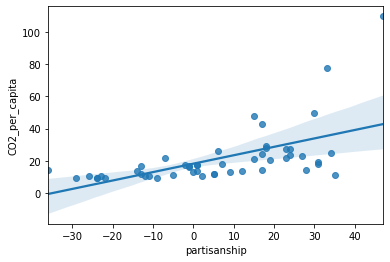

In [15]:
sns.regplot(y = 'CO2_per_capita', x = 'partisanship', data = state_dataset)
plt.savefig(FIG_DIR + 'CO2_partisanship.png')

## 1.3. CO2 and climate alliance

In [9]:
model = smf.ols(formula='CO2_per_capita ~ climate_alliance', data = state_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CO2_per_capita   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.293
Date:                Tue, 04 Jan 2022   Prob (F-statistic):            0.00593
Time:                        21:58:03   Log-Likelihood:                -210.62
No. Observations:                  50   AIC:                             425.2
Df Residuals:                      48   BIC:                             429.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           27.8500      3.270  

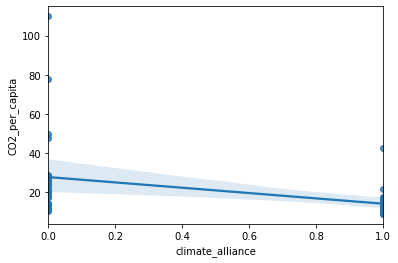

In [18]:
sns.regplot(y = 'CO2_per_capita', x = 'climate_alliance', data = state_dataset)
plt.savefig(FIG_DIR + 'CO2_climatealliance.png')

## 1.4. CO2 and is_democrat

In [10]:
model = smf.ols(formula='CO2_per_capita ~ is_democrat', data = state_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CO2_per_capita   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.479
Date:                Tue, 04 Jan 2022   Prob (F-statistic):             0.0395
Time:                        22:13:06   Log-Likelihood:                -212.37
No. Observations:                  50   AIC:                             428.7
Df Residuals:                      48   BIC:                             432.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.0963      3.323      7.852      

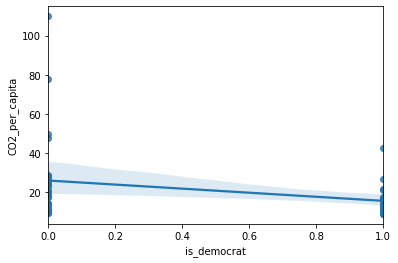

In [19]:
sns.regplot(y = 'CO2_per_capita', x = 'is_democrat', data = state_dataset)
plt.savefig(FIG_DIR + 'CO2_isdemocrat.png')

# 2. Climate Aliiance model

## 2.0: Viz

<AxesSubplot:xlabel='governor_party', ylabel='climate_alliance'>

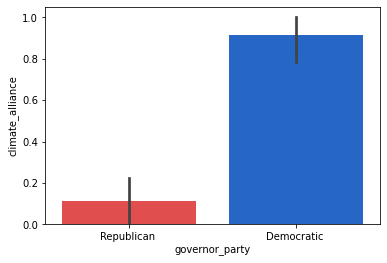

In [148]:
colors = ["#FA3535", "#0C61DF"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x = 'governor_party', y = 'climate_alliance', data = state_dataset)

<AxesSubplot:xlabel='climate_alliance', ylabel='count'>

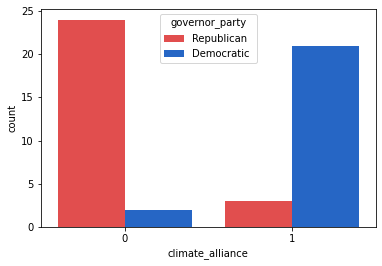

In [147]:
colors = ["#FA3535", "#0C61DF"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(x = 'climate_alliance', hue = 'governor_party', data = state_dataset)

<AxesSubplot:xlabel='governor_party', ylabel='count'>

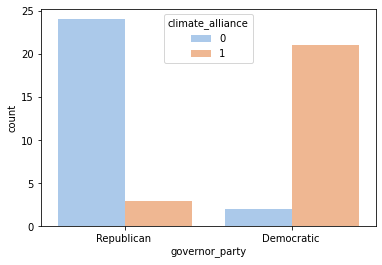

In [149]:
sns.countplot(hue = 'climate_alliance', x = 'governor_party', palette ='pastel', data = state_dataset)

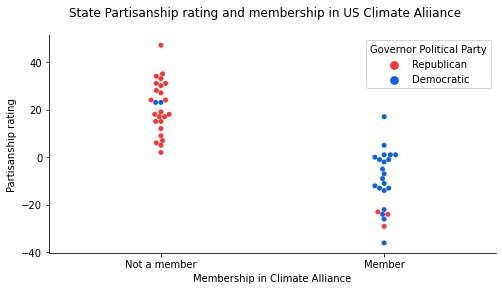

In [20]:
plt.figure(figsize = (8,4))
colors = ["#FA3535", "#0C61DF"]
sns.set_palette(sns.color_palette(colors))
sns.swarmplot(data = state_dataset, y = 'partisanship', x = 'climate_alliance', hue = 'governor_party')
plt.suptitle('State Partisanship rating and membership in US Climate Aliiance')
plt.xticks([0, 1], ['Not a member', 'Member'])
plt.xlabel('Membership in Climate Alliance')
plt.ylabel('Partisanship rating')
plt.legend(title = 'Governor Political Party', loc = 'best')
sns.despine()
plt.savefig(FIG_DIR + 'swarmplot.png')

## 2.1: Climate multiple regression model

### 2.1a: linear

In [91]:
model = smf.ols(formula='climate_alliance ~ partisanship + is_democrat', data = state_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       climate_alliance   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     118.7
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           4.20e-19
Time:                        19:57:34   Log-Likelihood:                 8.7643
No. Observations:                  50   AIC:                            -11.53
Df Residuals:                      47   BIC:                            -5.793
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3247      0.049      6.563      0.000       0.225       0.424
partisanship    -0.0135      0.002     -7.444      0.000      -0.017      -0.010
is_democrat      0.5151      0.071      7.273      0.000       0.373       0.658
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.648
Skew:                          -0.432   Prob(JB):                        0.439
Kurtosis:                       3.215   Cond. No.                         56.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
corr_matrix = state_dataset.corr()
corr_matrix['climate_alliance'].sort_values(ascending = False)

climate_alliance    1.000000
is_democrat         0.800002
CO2_per_capita     -0.383814
partisanship       -0.805516
Name: climate_alliance, dtype: float64

### 2.1b: logistic

## 2.2: Climate Alliance and partisanship

### 2.2a: linear

In [11]:
model = smf.ols(formula='climate_alliance ~ partisanship', data = state_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       climate_alliance   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     88.70
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.74e-12
Time:                        22:23:05   Log-Likelihood:                -10.086
No. Observations:                  50   AIC:                             24.17
Df Residuals:                      48   BIC:                             28.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6050      0.045     13.522   

<AxesSubplot:xlabel='partisanship', ylabel='climate_alliance'>

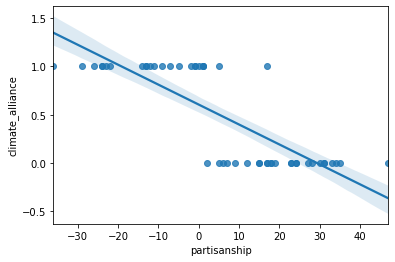

In [95]:
sns.regplot(y = 'climate_alliance', x = 'partisanship', data = state_dataset)

### 2.2b: logistic

In [105]:
#model

# defining the dependent and independent variables
X = state_dataset[['partisanship']]
y = state_dataset[['climate_alliance']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.250092
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       climate_alliance   No. Observations:                   50
Model:                          Logit   Df Residuals:                       49
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                  0.6388
Time:                        20:12:26   Log-Likelihood:                -12.505
converged:                       True   LL-Null:                       -34.617
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
partisanship    -0.2093      0.066     -3.164      0.002      -0.339      -0.080


/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


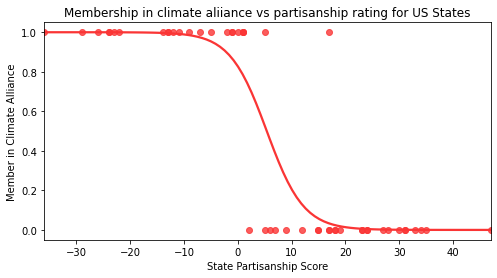

In [26]:
#plot
plt.figure(figsize = (8,4))
sns.regplot(y = 'climate_alliance', x = 'partisanship', data = state_dataset, logistic = True)
plt.title('Membership in climate aliiance vs partisanship rating for US States')
plt.ylabel('Member in Climate Alliance')
plt.xlabel('State Partisanship Score')
plt.savefig(FIG_DIR + 'climate_partisanship.png')

## 2.3: Climate Alliance and is_democrat

### 2.3a: linear

In [129]:
model = smf.ols(formula='climate_alliance ~ is_democrat', data = state_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       climate_alliance   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     85.33
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           3.18e-12
Time:                        20:23:30   Log-Likelihood:                -10.708
No. Observations:                  50   AIC:                             25.42
Df Residuals:                      48   BIC:                             29.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1111      0.059      1.887      0.065      -0.007       0.229
is_democrat     0.8019      0.087      9.238      0.000       0.627       0.976
==============================================================================
Omnibus:                       15.219   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.538
Skew:                           0.420   Prob(JB):                     8.71e-13
Kurtosis:                       8.094   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='is_democrat', ylabel='climate_alliance'>

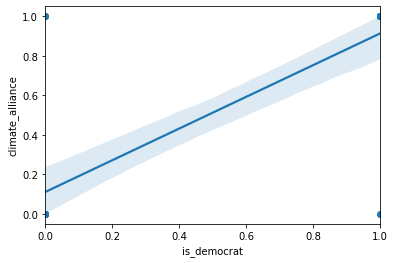

In [92]:
sns.regplot(y = 'climate_alliance', x = 'is_democrat', data = state_dataset)

### 2.3b: Logistic

!!!!!! The x axis is showing as continuous rather than binary/categorical

In [132]:
#model

# defining the dependent and independent variables
X = state_dataset[['is_democrat']]
y = state_dataset[['climate_alliance']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.510202
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       climate_alliance   No. Observations:                   50
Model:                          Logit   Df Residuals:                       49
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                  0.2631
Time:                        20:24:42   Log-Likelihood:                -25.510
converged:                       True   LL-Null:                       -34.617
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
is_democrat     2.3514      0.740      3.177      0.001       0.901       3.802


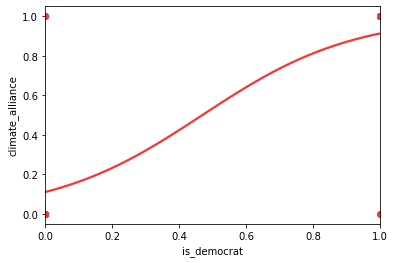

In [24]:
#logistic
sns.regplot(y = 'climate_alliance', x = 'is_democrat', data = state_dataset, logistic = True)
plt.savefig(FIG_DIR + 'climate_democrat.png')